In [1]:
import numpy as np
from h5py import File
import matplotlib.pyplot as plt
import dask.array as da
import os

In [2]:
dir_ = '/nrs/ahrens/jing/state_modulation/MG_vs_replayGU/20201101/fish02/9dpf_HuC-GC6F_MG-vs-ReplayGU_fish02_exp02_20201101_214112/im_CM0-voluseg/'
save_root = '/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20201101/fish02/9dpf_HuC-GC6F_MG-vs-ReplayGU_fish02_exp02_20201101_214112/im_CM0-voluseg/'
if not os.path.exists(save_root):
    os.makedirs(save_root)

PermissionError: [Errno 13] Permission denied: '/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20201101/fish02'

### brain map

In [ ]:
brain_map = np.load(save_root+'Y_ave.npy')

In [ ]:
plt.imshow(brain_map[10])
plt.show()

### Cell locations

In [5]:
A_center = np.load(save_root+'cell_center.npy')

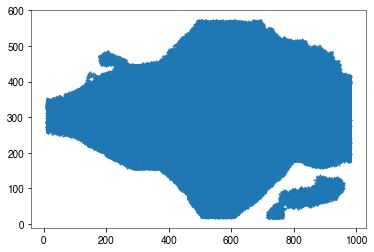

In [6]:
plt.scatter(A_center[:,0], A_center[:,1], s=1)
plt.show()

### dFF

In [7]:
_ = np.load(save_root+'cell_dff.npz')
dFF = _['dFF'].astype('float')
brain_shape = _['brain_shape']
X = _['X']
Y = _['Y']
Z = _['Z']
W = _['W']

### Put cell weights on the brain grids

In [8]:
func_map = np.zeros(brain_shape)
numCells = dFF.shape[0]
for cell_id in range(numCells):
    thres_ = 0.005
    w_ = (W[cell_id]>thres_)*W[cell_id]
    w_[np.isnan(w_)]=0
    x_loc, y_loc, z_loc = X[cell_id],Y[cell_id],Z[cell_id]
    func_map[x_loc, y_loc, z_loc]=np.maximum(func_map[x_loc,y_loc,z_loc], w_)

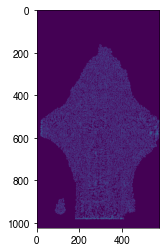

In [9]:
plt.imshow(func_map[:, :, 10])
plt.show()

### Put cell ids on the brain grids

In [10]:
func_map = np.zeros(brain_shape)-1
numCells = dFF.shape[0]
for cell_id in range(numCells):
    w_ = W[cell_id].copy()
    w_[np.isnan(w_)]=0
    thres_ = np.max(w_)*0.2 # 0.005
    w_[w_<thres_]=0
    x_loc, y_loc, z_loc = X[cell_id][w_>0],Y[cell_id][w_>0],Z[cell_id][w_>0]
    func_map[x_loc, y_loc, z_loc]=cell_id%16

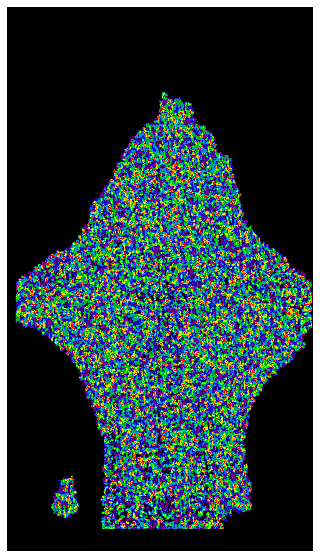

In [11]:
plt.figure(figsize=(8, 10))
plt.imshow(func_map[:, :, 10], cmap=plt.cm.nipy_spectral)
plt.axis('off')
plt.show()